### Coders Cave Internship - Data Science (Santha lakshmi S)
## PHASE 2 - Normal Task : Climate Data Analysis

In [77]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [78]:
# Step 1: Data Cleaning and Preprocessing

df = pd.read_csv('/content/monthly_data.csv')
df = df.dropna() # Handle missing data
df['DATE'] = pd.to_datetime(df['DATE']) # Convert date columns to datetime format

In [79]:
# Step 2: Exploratory Data Analysis (EDA)

print(df.describe()) # Descriptive Statistics

            STATION  SOURCE       AWND  BackupElevation  BackupLatitude  \
count  8.700000e+01    87.0  87.000000             87.0       87.000000   
mean   7.251801e+10     6.0   7.596552            260.0       42.689729   
...             ...     ...        ...              ...             ...   
75%    7.251801e+10     6.0   8.700000            260.0       42.691800   
max    7.251801e+10     6.0  10.700000            260.0       42.691800   

       BackupLongitude         CDSD        CLDD       DSNW         HDSD  ...  \
count        87.000000    87.000000   87.000000  87.000000    87.000000  ...   
mean        -73.828239   362.954023   60.252874   1.149425  3129.402299  ...   
...                ...          ...         ...        ...          ...  ...   
75%         -73.831090   741.000000  114.000000   2.000000  5567.000000  ...   
max         -73.816500  1026.000000  357.000000   5.000000  6913.000000  ...   

       MonthlyMaximumTemperature  MonthlyMeanTemperature  \
count   

In [80]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 46 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   STATION                                       87 non-null     int64         
 1   DATE                                          87 non-null     datetime64[ns]
 2   REPORT_TYPE                                   87 non-null     object        
 3   SOURCE                                        87 non-null     int64         
 4   AWND                                          87 non-null     float64       
 5   BackupElements                                87 non-null     object        
 6   BackupElevation                               87 non-null     int64         
 7   BackupEquipment                               87 non-null     object        
 8   BackupLatitude                                87 non-null     float64   

In [81]:
print(df.head())

        STATION                DATE REPORT_TYPE  SOURCE  AWND BackupElements  \
0   72518014735 2015-01-31 23:59:00       SOM         6   8.9         PRECIP   
1   72518014735 2015-02-28 23:59:00       SOM         6   8.7         PRECIP   
..          ...                 ...         ...     ...   ...            ...   
3   72518014735 2015-04-30 23:59:00       SOM         6   9.4         PRECIP   
4   72518014735 2015-05-31 23:59:00       SOM         6   8.3         PRECIP   

    BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  ...  \
0               260         PLASTIC         42.6918        -73.83109  ...   
1               260         PLASTIC         42.6918        -73.83109  ...   
..              ...             ...             ...              ...  ...   
3               260         PLASTIC         42.6918        -73.83109  ...   
4               260         PLASTIC         42.6918        -73.83109  ...   

   MonthlyMeanTemperature  MonthlyMinSeaLevelPressureVal

In [82]:
print(df.columns)

Index(['STATION', 'DATE', 'REPORT_TYPE', 'SOURCE', 'AWND', 'BackupElements',
       'BackupElevation', 'BackupEquipment', 'BackupLatitude',
       'BackupLongitude', 'BackupName', 'CDSD', 'CLDD', 'DSNW', 'HDSD', 'HTDD',
       'MonthlyDaysWithGT001Precip', 'MonthlyDaysWithGT010Precip',
       'MonthlyDaysWithGT32Temp', 'MonthlyDaysWithGT90Temp',
       'MonthlyDaysWithLT0Temp', 'MonthlyDaysWithLT32Temp',
       'MonthlyDepartureFromNormalAverageTemperature',
       'MonthlyDepartureFromNormalCoolingDegreeDays',
       'MonthlyDepartureFromNormalHeatingDegreeDays',
       'MonthlyDepartureFromNormalMaximumTemperature',
       'MonthlyDepartureFromNormalMinimumTemperature',
       'MonthlyDepartureFromNormalPrecipitation', 'MonthlyGreatestPrecip',
       'MonthlyGreatestPrecipDate', 'MonthlyGreatestSnowDepth',
       'MonthlyGreatestSnowfall', 'MonthlyMaxSeaLevelPressureValue',
       'MonthlyMaxSeaLevelPressureValueDate',
       'MonthlyMaxSeaLevelPressureValueTime', 'MonthlyMaximumTemp

In [83]:
df[df["MonthlyMeanTemperature"]\
.between(20.5, 31, inclusive="neither")]

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,...,MonthlyMeanTemperature,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureValueDate,MonthlyMinSeaLevelPressureValueTime,MonthlyMinimumTemperature,MonthlySeaLevelPressure,MonthlyStationPressure,MonthlyTotalLiquidPrecipitation,NormalsHeatingDegreeDay,WindEquipmentChangeDate
2,72518014735,2015-03-31 23:59:00,SOM,6,9.4,PRECIP,260,PLASTIC,42.6918,-73.83109,...,29.8,29.56,17.0,1251.0,20.7,30.10,29.76,1.25,929.0,2006-09-08
12,72518014735,2016-01-31 23:59:00,SOM,6,8.7,PRECIP,260,PLASTIC,42.6918,-73.83109,...,27.7,29.20,10.0,1551.0,19.5,29.99,29.66,1.24,1316.0,2006-09-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72518014735,2021-02-28 23:59:00,SOM,6,7.6,PRECIP,260,PLASTIC,42.6812,-73.81650,...,23.7,29.46,3.0,544.0,16.9,30.10,29.77,1.78,1093.0,2006-09-08
83,72518014735,2022-02-28 23:59:00,SOM,6,10.3,PRECIP,260,PLASTIC,42.6812,-73.81650,...,27.5,29.16,18.0,451.0,17.3,30.17,29.85,2.77,1093.0,2006-09-08


In [84]:
df.select_dtypes(include=np.number).head()

,STATION,SOURCE,AWND,BackupElevation,BackupLatitude,BackupLongitude,CDSD,CLDD,DSNW,HDSD,...,MonthlyMaximumTemperature,MonthlyMeanTemperature,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureValueDate,MonthlyMinSeaLevelPressureValueTime,MonthlyMinimumTemperature,MonthlySeaLevelPressure,MonthlyStationPressure,MonthlyTotalLiquidPrecipitation,NormalsHeatingDegreeDay
0,72518014735,6,8.9,260,42.6918,-73.83109,0.0,0.0,5.0,3694.0,...,28.9,19.7,29.32,24.0,1707.0,10.5,30.11,29.77,2.17,1316.0
1,72518014735,6,8.7,260,42.6918,-73.83109,0.0,0.0,5.0,5154.0,...,23.0,12.7,29.56,15.0,151.0,2.4,30.09,29.75,2.15,1093.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,72518014735,6,9.4,260,42.6918,-73.83109,0.0,0.0,0.0,6757.0,...,58.7,47.8,29.54,21.0,451.0,36.9,29.98,29.66,2.10,520.0
4,72518014735,6,8.3,260,42.6918,-73.83109,118.0,118.0,0.0,6858.0,...,78.4,65.6,29.71,12.0,1251.0,52.8,30.09,29.77,1.05,235.0


In [85]:
df.select_dtypes(exclude=np.number).head()

,DATE,REPORT_TYPE,BackupElements,BackupEquipment,BackupName,MonthlyGreatestPrecipDate,MonthlyGreatestSnowDepth,MonthlyGreatestSnowfall,WindEquipmentChangeDate
0,2015-01-31 23:59:00,SOM,PRECIP,PLASTIC,"NWS ALBANY, NY",03-04,6.0,5.6,2006-09-08
1,2015-02-28 23:59:00,SOM,PRECIP,PLASTIC,"NWS ALBANY, NY",02-02,17.0,11.9,2006-09-08
...,...,...,...,...,...,...,...,...,...
3,2015-04-30 23:59:00,SOM,PRECIP,PLASTIC,"NWS ALBANY, NY",20-21,0.0,0.0,2006-09-08
4,2015-05-31 23:59:00,SOM,PRECIP,PLASTIC,"NWS ALBANY, NY",30-31,0.0,0.0,2006-09-08


In [86]:
df['MonthlyMinSeaLevelPressureValueTime'].hasnans

False

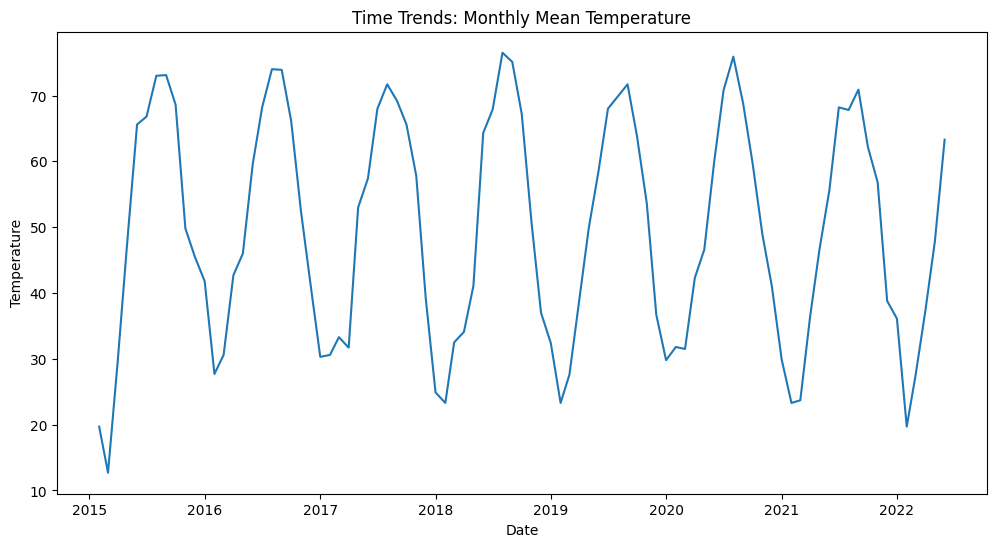

In [87]:
# Step:3 Visualization

# Time Trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='DATE', y='MonthlyMeanTemperature', data=df)
plt.title('Time Trends: Monthly Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

<ipython-input-88-d496e50dd68e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


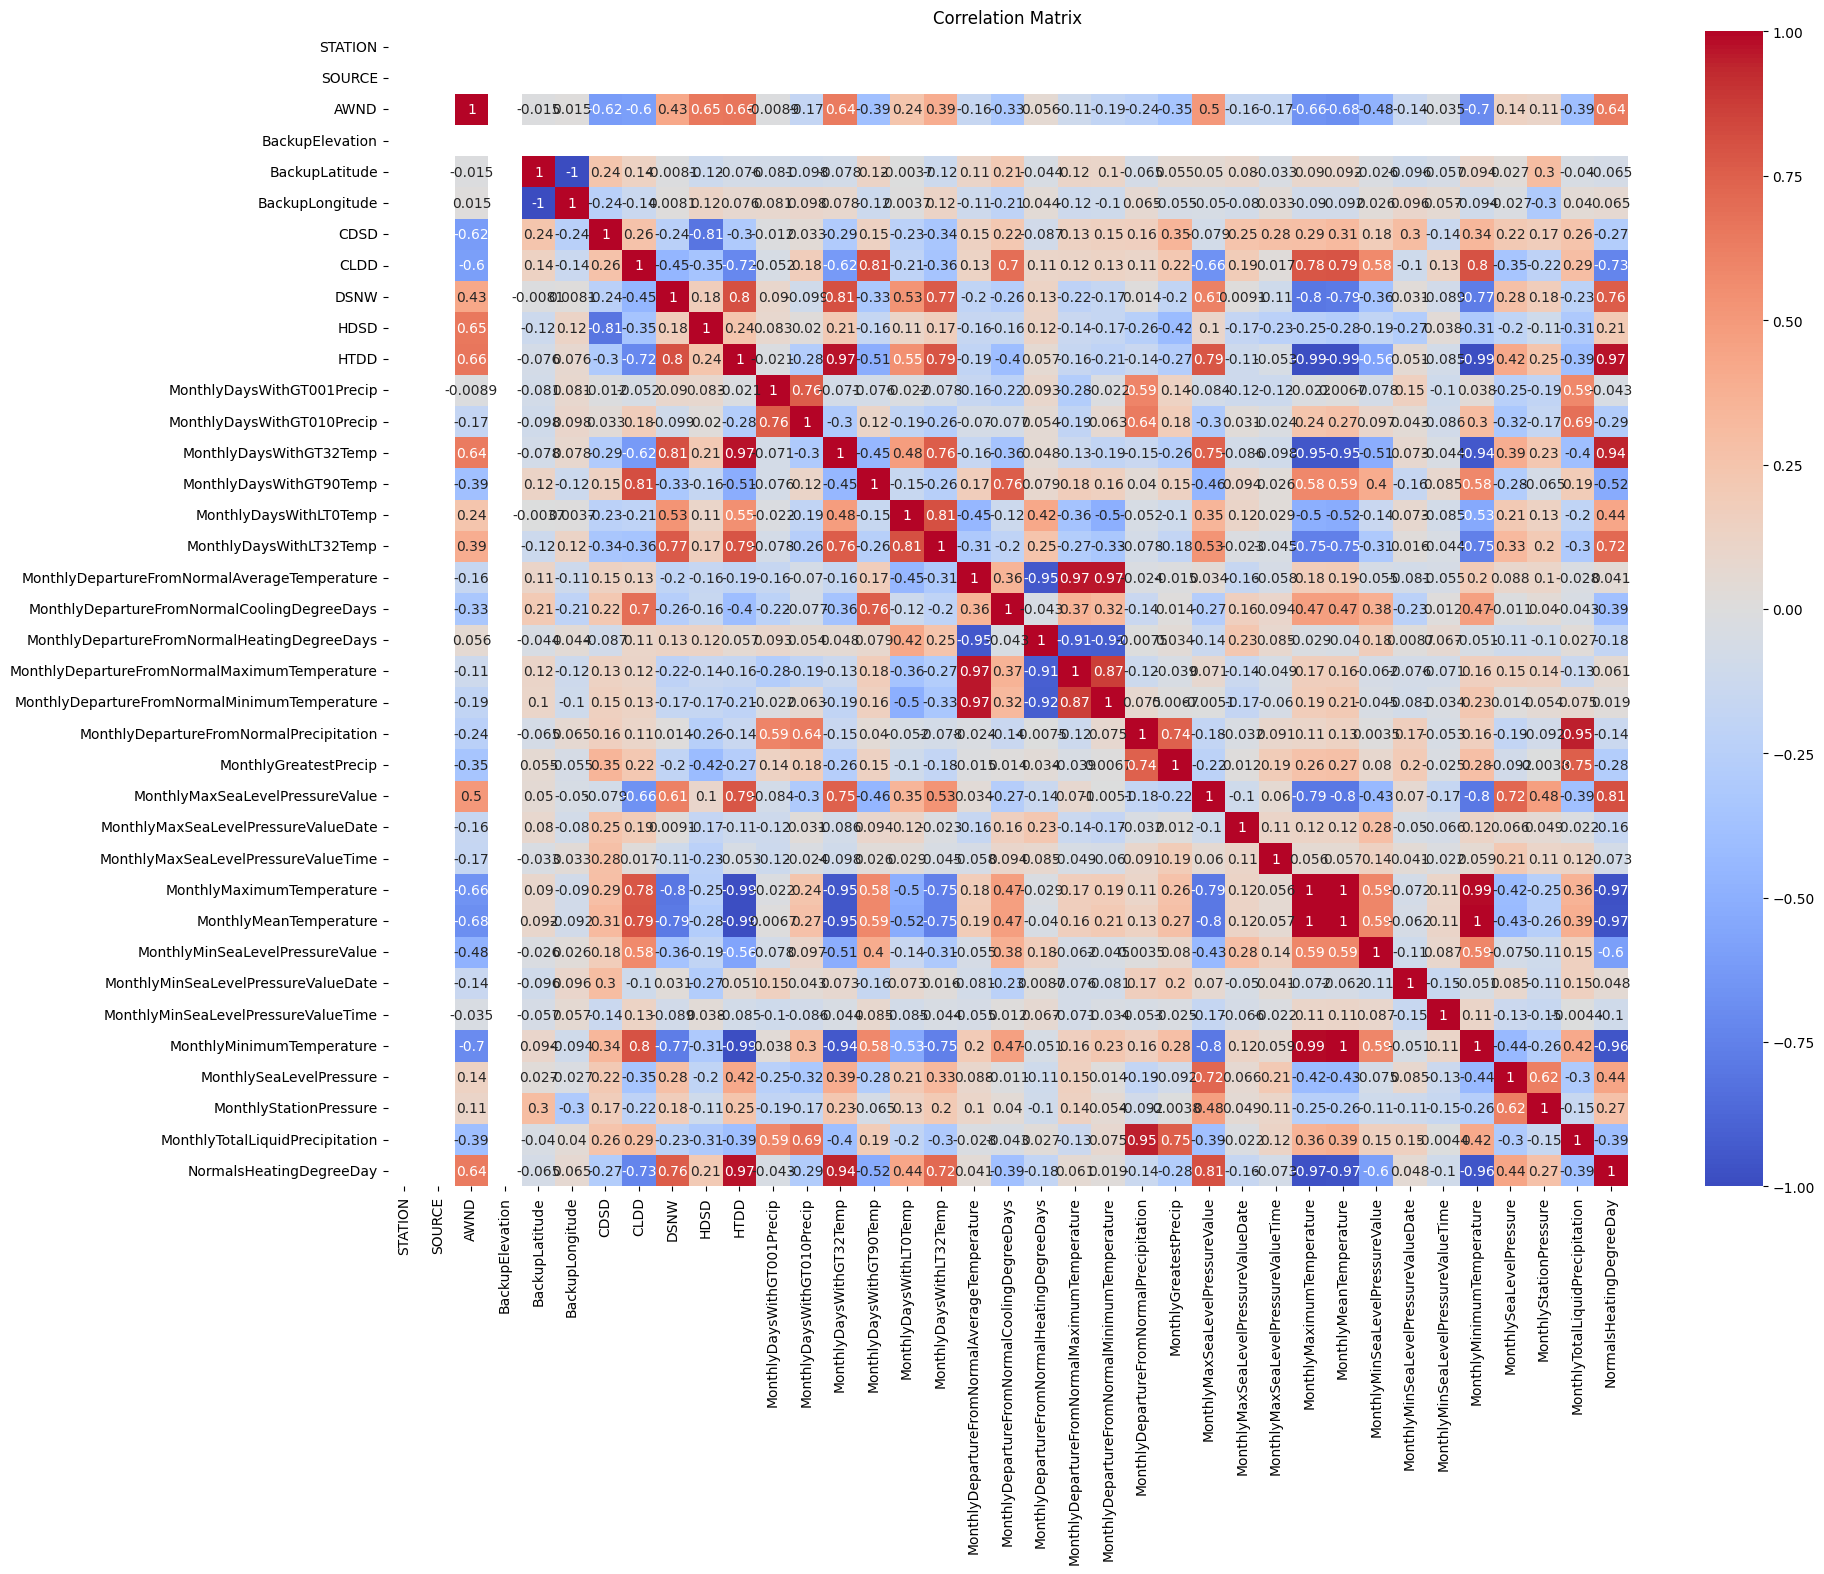

In [88]:
# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

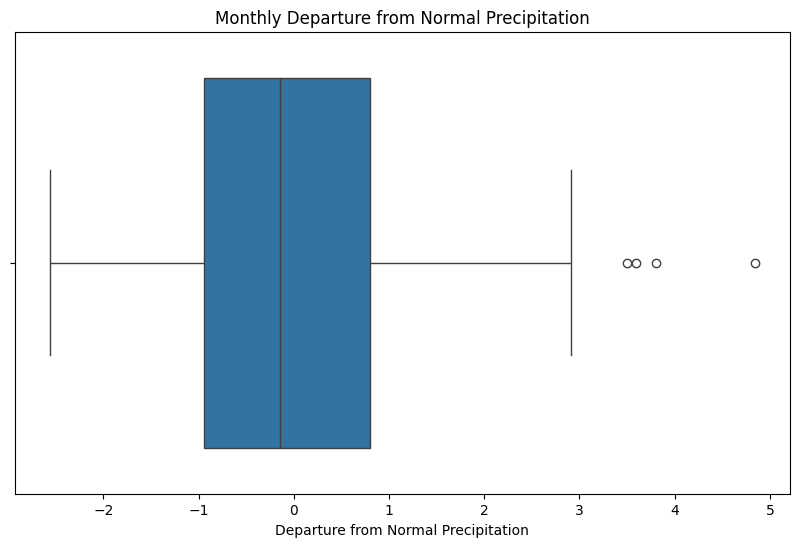

In [89]:
# Boxplot of MonthlyDepartureFromNormalPrecipitation
plt.figure(figsize=(10, 6))
sns.boxplot(x='MonthlyDepartureFromNormalPrecipitation', data=df)
plt.title('Monthly Departure from Normal Precipitation')
plt.xlabel('Departure from Normal Precipitation')
plt.show()

<ipython-input-90-b30b86258b83>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


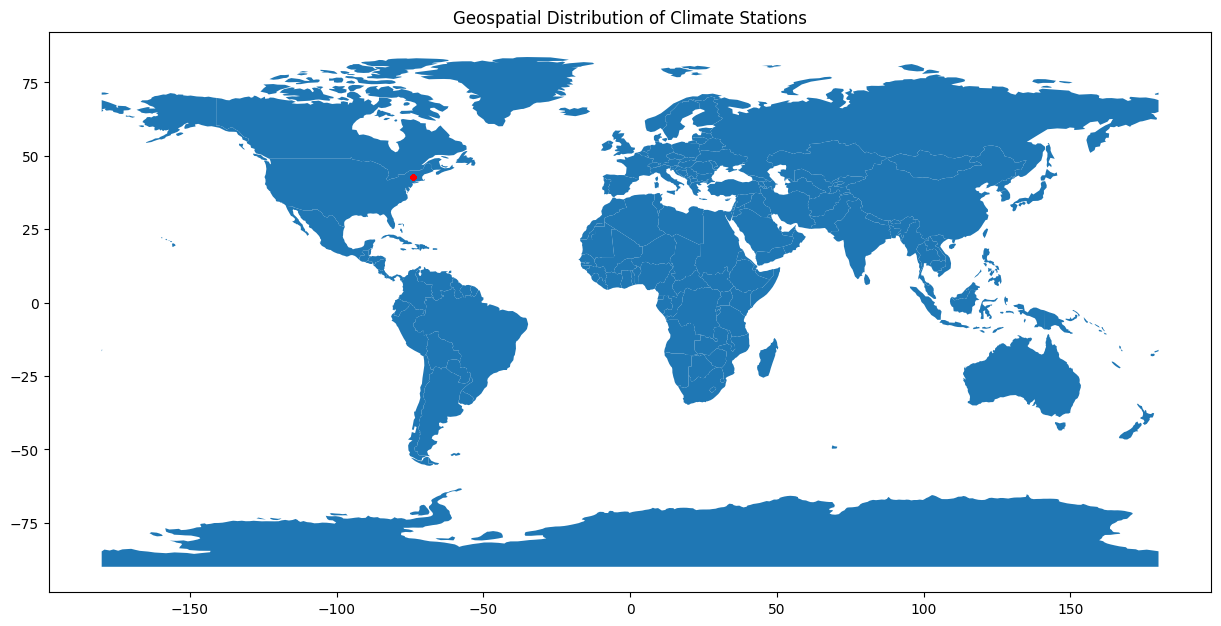

In [90]:
# Geospatial Analysis
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.BackupLongitude, df.BackupLatitude))

# Plot the geospatial data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(15, 10))
gdf.plot(ax=ax, marker='o', color='red', markersize=10, alpha=0.5)
plt.title('Geospatial Distribution of Climate Stations')
plt.show()

# Folium Map with Marker Cluster
m = folium.Map(location=[df.BackupLatitude.mean(), df.BackupLongitude.mean()], zoom_start=4)
marker_cluster = MarkerCluster().add_to(m)

for i, row in df.iterrows():
    folium.Marker([row['BackupLatitude'], row['BackupLongitude']],
                  popup=f"Station: {row['STATION']}, Temperature: {row['MonthlyMeanTemperature']}").add_to(marker_cluster)

In [91]:
# Checking top 5 highest and lowest monthly mean temperatures

df.nlargest(5, "MonthlyMeanTemperature")

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,...,MonthlyMeanTemperature,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureValueDate,MonthlyMinSeaLevelPressureValueTime,MonthlyMinimumTemperature,MonthlySeaLevelPressure,MonthlyStationPressure,MonthlyTotalLiquidPrecipitation,NormalsHeatingDegreeDay,WindEquipmentChangeDate
42,72518014735,2018-07-31 23:59:00,SOM,6,5.8,PRECIP,260,PLASTIC,42.6918,-73.83109,...,76.5,29.75,17.0,1651.0,65.7,30.06,29.75,4.72,5.0,2006-09-08
64,72518014735,2020-07-31 23:59:00,SOM,6,6.3,PRECIP,260,PLASTIC,42.6918,-73.83109,...,75.9,29.54,12.0,151.0,65.5,29.93,29.61,3.57,5.0,2006-09-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,72518014735,2016-07-31 23:59:00,SOM,6,6.7,PRECIP,260,PLASTIC,42.6918,-73.83109,...,74.0,29.71,7.0,1551.0,63.1,29.94,29.63,6.44,5.0,2006-09-08
19,72518014735,2016-08-31 23:59:00,SOM,6,6.3,PRECIP,260,PLASTIC,42.6918,-73.83109,...,73.9,29.68,6.0,1549.0,63.7,30.02,29.72,3.94,18.0,2006-09-08


In [92]:
df.nsmallest(5, "MonthlyMeanTemperature")

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,...,MonthlyMeanTemperature,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureValueDate,MonthlyMinSeaLevelPressureValueTime,MonthlyMinimumTemperature,MonthlySeaLevelPressure,MonthlyStationPressure,MonthlyTotalLiquidPrecipitation,NormalsHeatingDegreeDay,WindEquipmentChangeDate
1,72518014735,2015-02-28 23:59:00,SOM,6,8.7,PRECIP,260,PLASTIC,42.6918,-73.83109,...,12.7,29.56,15.0,151.0,2.4,30.09,29.75,2.15,1093.0,2006-09-08
0,72518014735,2015-01-31 23:59:00,SOM,6,8.9,PRECIP,260,PLASTIC,42.6918,-73.83109,...,19.7,29.32,24.0,1707.0,10.5,30.11,29.77,2.17,1316.0,2006-09-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,72518014735,2018-01-31 23:59:00,SOM,6,9.2,PRECIP,260,PLASTIC,42.6918,-73.83109,...,23.3,29.41,4.0,1851.0,14.8,30.17,29.83,2.39,1316.0,2006-09-08
48,72518014735,2019-01-31 23:59:00,SOM,6,9.6,PRECIP,260,PLASTIC,42.6918,-73.83109,...,23.3,29.36,24.0,1351.0,14.7,30.06,29.75,4.29,1316.0,2006-09-08


In [93]:
df["MonthlyStationPressure"].mask(cond=~df["MonthlyStationPressure"].between(29.0, 29.75), other=np.nan).to_frame()

,MonthlyStationPressure
0,NaN
1,29.75
...,...
85,29.66
86,29.72
